<a href="https://colab.research.google.com/github/hiRun6/deepLearning_/blob/main/derinogrenmeZatureTerpiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# verisetinin bulunduğu dizinin dahil edilmesi

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/0-BilgMuh-YL
print("----------------------------------------------\n")
!ls

/content/drive/MyDrive/Colab Notebooks/0-BilgMuh-YL
----------------------------------------------

chest-X-ray.ipynb  cnn.model  ds-chest-X-ray  process.ipynb  Untitled0.ipynb


# Kütüphanelerin dahil edilmesi

In [ ]:

%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import model_selection

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

In [ ]:
from keras.models import Sequential, load_model

from keras.layers import Dense, Dropout, Flatten

from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.utils.np_utils import to_categorical

# Veri setinin düzenlemesi

In [ ]:
import cv2
import os
import glob
import gc

def lire_images(img_dir, xdim, ydim, nmax=5000) :

    label = 0
    label_names = []
    X = []
    y=[]
    for dirname in os.listdir(img_dir):
        print(dirname)
        label_names.append(dirname)
        data_path = os.path.join(img_dir + "/" + dirname,'*g')
        files = glob.glob(data_path)
        n=0
        for f1 in files:
            if n>nmax : break
            img = cv2.imread(f1)
            img = cv2.resize(img, (xdim,ydim))
            X.append(np.array(img))
            y.append(label)
            n=n+1
        print(n,' images lues')
        label = label+1
    X = np.array(X)
    y = np.array(y)
    gc.collect() # Récupération de mémoire
    return X,y, label, label_names

In [ ]:
X,y,nlabels,labels = lire_images("/content/drive/MyDrive/Colab Notebooks/0-BilgMuh-YL/ds-chest-X-ray/test/", 224, 224, 2000)

PNEUMONIA
390  images lues
NORMAL
234  images lues


In [ ]:
labels

['PNEUMONIA', 'NORMAL']

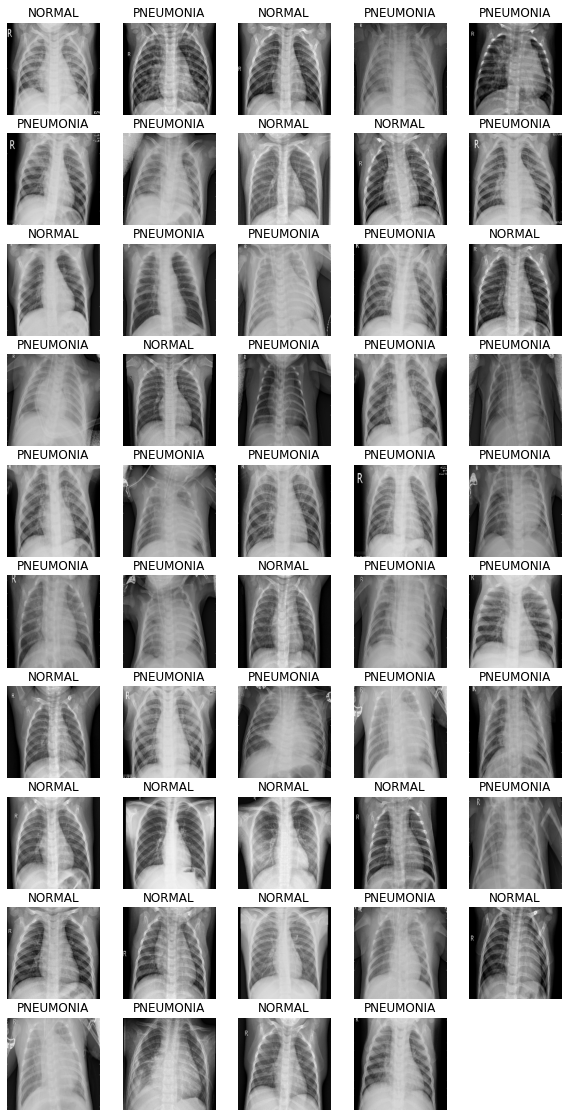

In [ ]:
import random
plt.figure(figsize=(10,20))
for i in range(0,49) :
    plt.subplot(10,5,i+1)
    j = random.randint(0,len(X))
    plt.axis('off')
    plt.imshow(X[j])
    plt.title(labels[y[j]])

In [ ]:
y = to_categorical(y)

In [ ]:
X.shape

(624, 224, 224, 3)

# Normalizasyon

In [ ]:
X = X / 255
print(X[0][0])

[[0.16862745 0.16862745 0.16862745]
 [0.17254902 0.17254902 0.17254902]
 [0.18431373 0.18431373 0.18431373]
 [0.19215686 0.19215686 0.19215686]
 [0.20392157 0.20392157 0.20392157]
 [0.2        0.2        0.2       ]
 [0.20392157 0.20392157 0.20392157]
 [0.21568627 0.21568627 0.21568627]
 [0.22352941 0.22352941 0.22352941]
 [0.21568627 0.21568627 0.21568627]
 [0.22352941 0.22352941 0.22352941]
 [0.21568627 0.21568627 0.21568627]
 [0.21176471 0.21176471 0.21176471]
 [0.21960784 0.21960784 0.21960784]
 [0.21568627 0.21568627 0.21568627]
 [0.20784314 0.20784314 0.20784314]
 [0.21960784 0.21960784 0.21960784]
 [0.18039216 0.18039216 0.18039216]
 [0.16862745 0.16862745 0.16862745]
 [0.18039216 0.18039216 0.18039216]
 [0.18039216 0.18039216 0.18039216]
 [0.18823529 0.18823529 0.18823529]
 [0.19607843 0.19607843 0.19607843]
 [0.19215686 0.19215686 0.19215686]
 [0.20784314 0.20784314 0.20784314]
 [0.2        0.2        0.2       ]
 [0.2        0.2        0.2       ]
 [0.19607843 0.19607843 0.19

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# modelin oluşturulması

In [ ]:

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(224, 224, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 flatten_1 (Flatten)         (None, 1548800)           0         
                                                                 
 dense_1 (Dense)             (None, 2)                 3097602   
                                                                 
Total params: 3,100,034
Trainable params: 3,100,034
Non-trainable params: 0
_________________________________________________________________


# modelin eğitilmesi

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=1)

Epoch 1/50
3/3 [==============================] - 3s 725ms/step - loss: 86.2848 - accuracy: 0.5419 - val_loss: 82.3721 - val_accuracy: 0.5714
Epoch 2/50
3/3 [==============================] - 2s 562ms/step - loss: 42.9277 - accuracy: 0.5544 - val_loss: 46.4281 - val_accuracy: 0.4286
Epoch 3/50
3/3 [==============================] - 2s 503ms/step - loss: 38.1175 - accuracy: 0.3690 - val_loss: 0.9528 - val_accuracy: 0.7460
Epoch 4/50
3/3 [==============================] - 2s 488ms/step - loss: 5.4084 - accuracy: 0.7023 - val_loss: 10.5569 - val_accuracy: 0.5714
Epoch 5/50
3/3 [==============================] - 2s 488ms/step - loss: 5.8023 - accuracy: 0.6310 - val_loss: 6.9742 - val_accuracy: 0.4286
Epoch 6/50
3/3 [==============================] - 2s 472ms/step - loss: 5.4022 - accuracy: 0.3725 - val_loss: 0.5696 - val_accuracy: 0.6667
Epoch 7/50
3/3 [==============================] - 2s 487ms/step - loss: 0.5497 - accuracy: 0.6934 - val_loss: 0.5802 - val_accuracy: 0.6667
Epoch 8/50
3/3

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 90.48%


# Eğitilen modelin Görselleştirilmesi

In [ ]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

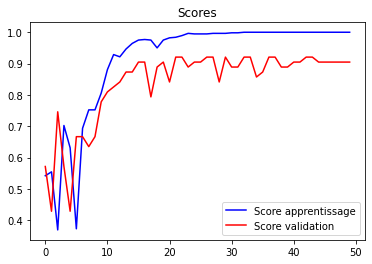

In [ ]:
plot_scores(train)

In [ ]:
y_cnn = np.argmax(model.predict(X_test), axis=1)

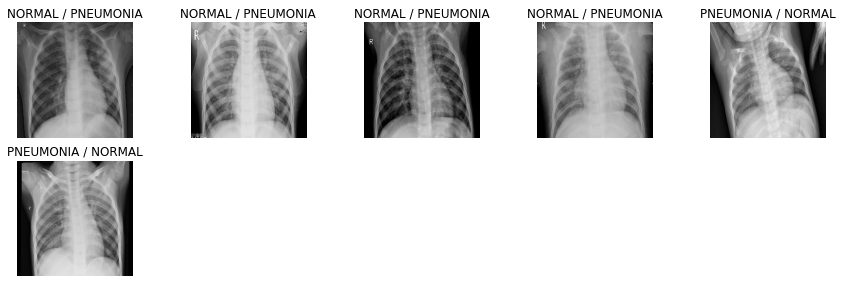

In [ ]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
i=1
for j in range(len(X_test)) :
    if (y_cnn[j] != y_test[j].argmax(axis=-1)) & (i<50):
        plt.subplot(10,5,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (labels[y_cnn[j]], labels[y_test[j].argmax(axis=-1)]))
        i+=1

# Revize edilmiş Cnn modeli oluşturma

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(20, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(20, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(2, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 20)      5780      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 20)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 20)       

In [ ]:
train = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=1)

Epoch 1/50
3/3 [==============================] - 6s 2s/step - loss: 0.7749 - accuracy: 0.5348 - val_loss: 0.6899 - val_accuracy: 0.5714
Epoch 2/50
3/3 [==============================] - 1s 408ms/step - loss: 0.6679 - accuracy: 0.6310 - val_loss: 0.6888 - val_accuracy: 0.5714
Epoch 3/50
3/3 [==============================] - 1s 392ms/step - loss: 0.6600 - accuracy: 0.6310 - val_loss: 0.6847 - val_accuracy: 0.5714
Epoch 4/50
3/3 [==============================] - 1s 403ms/step - loss: 0.6498 - accuracy: 0.6310 - val_loss: 0.6772 - val_accuracy: 0.5714
Epoch 5/50
3/3 [==============================] - 1s 403ms/step - loss: 0.6368 - accuracy: 0.6310 - val_loss: 0.6677 - val_accuracy: 0.5714
Epoch 6/50
3/3 [==============================] - 1s 399ms/step - loss: 0.6113 - accuracy: 0.6399 - val_loss: 0.6484 - val_accuracy: 0.6032
Epoch 7/50
3/3 [==============================] - 1s 405ms/step - loss: 0.5699 - accuracy: 0.7647 - val_loss: 0.6130 - val_accuracy: 0.7302
Epoch 8/50
3/3 [=======

In [ ]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 92.06%


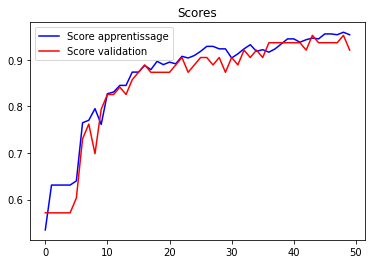

In [ ]:
plot_scores(train)

In [ ]:
predict_y = model2.predict(X_test) 
y_cnn = np.argmax(predict_y, axis=1)

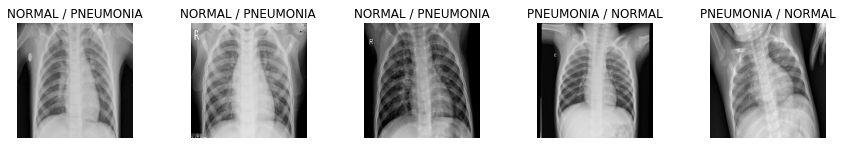

In [ ]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
i=1
for j in range(len(X_test)) :
    if (y_cnn[j] != y_test[j].argmax(axis=-1)) & (i<50):
        plt.subplot(10,5,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (labels[y_cnn[j]], labels[y_test[j].argmax(axis=-1)]))
        i+=1

# Eğitilmiş modelin kaydedilmesi

In [ ]:
model2.save('chest_cnn2.h5')

In [ ]:
new_model = load_model('chest_cnn2.h5')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 20)      5780      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 20)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 20)       

In [ ]:
scores = new_model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 92.06%
